In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("data/Online_Cars_Sale_Marketplace.csv")
df.head(20)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
5,2012,Toyota,4Runner SR5,Used,"$23,541",4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469
6,2017,Honda,HR-V LX,Used,"$20,995",4.6,200,Dealer,Downtown Toyota-Subaru of Oakland,4.4,...,Black,Front-wheel Drive,28,34,Gasoline,Automatic CVT,1.8L I4 16V MPFI SOHC,3CZRU5H32HG703897,T1480,10458
7,2014,Mercedes-Benz,E-Class E 350,Used,"$18,985",4.8,176,Dealer,Downtown Toyota-Subaru of Oakland,4.4,...,Saffron,Rear-wheel Drive,21,30,Gasoline,7-Speed Automatic,3.5L V6 24V GDI DOHC,WDDHF5KB3EA778099,224922A,58157
8,2021,Honda,Pilot Touring 8-Passenger,Used,"$44,299",4.8,63,Dealer,EchoPark Automotive Phoenix,4.9,...,Beige,All-wheel Drive,19,26,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H90MB052856,YMB052856,14445
9,2020,Dodge,Charger Scat Pack,Dodge Certified,"$46,773",4.8,56,Dealer,Bill Luke Chrysler Jeep Dodge RAM,4.3,...,Black,Rear-wheel Drive,15,24,Gasoline,8-Speed Automatic,6.4L V8 16V MPFI OHV,2C3CDXGJ8LH157532,CBY705,25642


In [17]:
df['SellerName'].value_counts().head(1)

SellerName
EchoPark Automotive Greenville    36
Name: count, dtype: int64

In [ ]:
Dealer with the most lsitings?

In [21]:
top_dealer = df['SellerName'].value_counts().idxmax()
count = df['SellerName'].value_counts().max()
print(f"The dealer with the most listings is {top_dealer} with {count} listings.")

The dealer with the most listings is EchoPark Automotive Greenville with 36 listings.


In [29]:
print(df.columns.tolist())

['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating', 'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG', 'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage']


In [43]:

print(df.columns.tolist())

['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating', 'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG', 'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage']


list the least expensive car from each dealership

In [47]:
# Clean column names (makes things easier)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Sort by price from lowest to highest
df_sorted = df.sort_values(by='price', ascending=True)

# Get the cheapest car from each dealership
cheapest_by_dealer = df_sorted.groupby('sellername').first().reset_index()

# Show the 10 cheapest cars by dealership
cheapest_by_dealer[['sellername', 'make', 'model', 'year', 'price']].head(20)


,sellername,make,model,year,price
0,#1 Cochran Buick GMC Monroeville,Mercedes-Benz,GLC 300 Base 4MATIC,2020,"$46,491"
1,#1 Cochran Chevrolet,Chevrolet,Equinox LT,2017,"$20,678"
2,#1 Cochran Ford,RAM,1500 Laramie,2020,"$48,421"
3,#1 Cochran Hyundai Monroeville,Hyundai,Tucson SE,2019,"$24,972"
4,#1 Cochran Kia Robinson,Kia,Sportage LX,2020,"$25,795"
5,#1 Cochran Nissan Monroeville,Nissan,Rogue SV,2019,"$30,214"
6,#1 Cochran Nissan West Hills,Nissan,Rogue SL,2018,"$28,506"
7,#1 Cochran Subaru Monroeville,Subaru,Forester,2019,"$26,492"
8,1 US Motors,INFINITI,Q50 Base,2015,"$20,900"
9,21 Century Auto Group,Dodge,Durango SRT Hellcat,2021,"$100,000"


In [ ]:
what make has the most listings?

In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# (Optional) Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [9]:
top_5_makes = df['make'].value_counts().head(5)

print("Top 5 car makes with the most listings:")
print(top_5_makes)

Top 5 car makes with the most listings:
make
BMW              944
Mercedes-Benz    810
Toyota           797
Honda            713
Ford             580
Name: count, dtype: int64


Cars that are priced between 20000 and 30000

In [19]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Now filter cars priced between 20,000 and 30,000
mid_price_cars = df[(df['price'] >= 20000) & (df['price'] <= 30000)]

# Show the first few results
mid_price_cars[['make', 'model', 'year', 'price']].head(100)

,make,model,year,price


In [21]:
print(mid_price_cars.shape[0])

0


In [23]:
print(mid_price_cars.shape[0])

0


In [25]:
print(df['price'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64


In [29]:
import pandas as pd

# Reload your original file
df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# Clean the columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [31]:
print(df['price'].head(10))

0    $39,998
1    $49,985
2    $41,860
3    $28,500
4    $49,000
5    $23,541
6    $20,995
7    $18,985
8    $44,299
9    $46,773
Name: price, dtype: object


In [33]:
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [35]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [37]:
id_price_cars = df[(df['price'] >= 20000) & (df['price'] <= 30000)]

# Show results
mid_price_cars[['make', 'model', 'year', 'price']].head(10)


,make,model,year,price


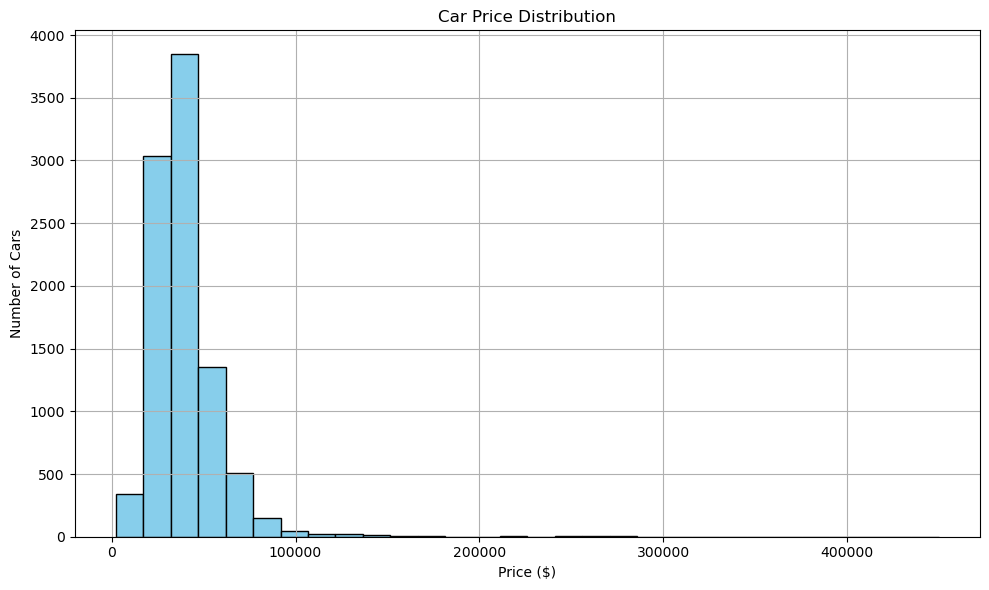

In [39]:
import matplotlib.pyplot as plt

# Make a histogram of car prices
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=30, color='skyblue', edgecolor='black')

plt.title('Car Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.tight_layout()
plt.show()

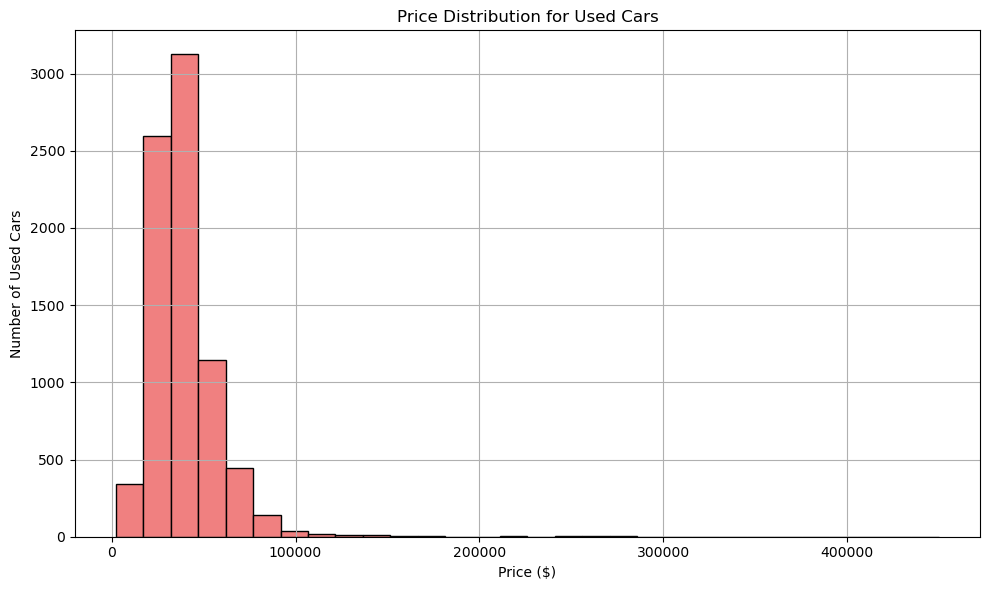

In [41]:
import matplotlib.pyplot as plt

# Filter the DataFrame to only USED cars
# (Assuming you have a column named 'used/new' that says 'Used' or 'New')
used_cars = df[df['used/new'].str.lower() == 'used']

# Make a histogram of prices for used cars
plt.figure(figsize=(10,6))
plt.hist(used_cars['price'].dropna(), bins=30, color='lightcoral', edgecolor='black')

plt.title('Price Distribution for Used Cars')
plt.xlabel('Price ($)')
plt.ylabel('Number of Used Cars')
plt.grid(True)
plt.tight_layout()
plt.show()